<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways_visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 3rd May, 2024
# Click on the button 'Open in Colab' above to work in colab

## Preliminary

In [1]:
# 0.0 Reset memory when repeating experiment
%reset -f

In [2]:
# We work both in python and R

%load_ext rpy2.ipython

In [3]:
# 0.1 Print output from mulitple commands in a cell
# Ref: https://stackoverflow.com/a/48036735

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Call libraries
Install software and call libraries.      
These libraries are both for Data Visualization and also for Machine Learning

In [4]:
%%R

# R packages install. Takes time..

install.packages("tidyverse")
install.packages("vcd")
install.packages("vcdExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/Rtmp7uFapb/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zoo’, ‘colorspace’, ‘lmtest’

trying URL 'https://cran.rstudio.com/src/contrib/zoo_1.8-14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/colorspace_2.1-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/lmtest_0.9-40.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/vcd_1.4-13.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmp7uFapb/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘qvcalc’, ‘relimp’, ‘gnm’, ‘ca’, ‘here’

trying URL 'https://cran

In [5]:
#1.1  Data preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#1.2 Split data into X_train/X_test
from sklearn.model_selection import train_test_split

#1.3 For cross-validation and stratified k-fold partitions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

#1.4 Encoders
#import category_encoders as ce

#1.5 For plotting/printing
import matplotlib.pyplot as plt
import seaborn as sns
# Pretty-print tabular data in Python, a
import tabulate

#1.6 Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#1.7 Hyperparameter search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#1.8 Classification reports
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# 1.9 Misc. Used in hyperparameter search
from scipy.stats import loguniform

In [6]:
%%R

# Call R libraries
library(tidyverse)
library(vcd)
library(vcdExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: grid
Loading required package: gnm

Attaching package: ‘vcdExtra’

The following object is masked from ‘package:dplyr’:

    summarise



In [7]:
#1.8 Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
%%R
# Avoid warnings from R-code

options(warn=-1)

## Read/examine data

### Read data

In [9]:
# 2.1 Read data from github repo

df=pd.read_csv('https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv')
df.shape   # (1000, 13)

(1000, 13)

In [10]:
%%R

# 2.1.1 Read data in R dataframe

df_r <- read.csv("https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv")

# Rename columns
colnames(df_r) <- c("age", "sex", "height", "subluxation_of_mandible", "head_and_neck_movement",
                  "buck_teeth", "edentulous", "bmi", "sternomental_distance",
                  "thyromental_distance", "mallampatti", "mouth_opening", "cormack_lehane")

# Display two rows
head(df_r,2)


  age    sex height subluxation_of_mandible head_and_neck_movement buck_teeth
1  22   male    172                       1                      0          1
2  55 female    143                       1                      0          1
  edentulous   bmi sternomental_distance thyromental_distance mallampatti
1          0 22.40                    17                  8.6           2
2          0 27.45                    16                  7.8           2
  mouth_opening cormack_lehane
1             0              2
2             0              1


In [11]:
# 2.1.1 Data stats

df.head()
df.describe()
df.info()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


,age,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,998.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,43.498000,163.035000,0.206000,0.104000,0.259000,0.173347,23.895350,16.935400,8.101800,1.9100,0.010000,1.826000
std,11.742823,11.470804,0.491738,0.305413,0.440583,0.378737,3.869877,1.592276,0.919566,0.6902,0.099549,0.714307
min,20.000000,132.000000,0.000000,0.000000,0.000000,0.000000,13.800000,12.500000,5.600000,1.0000,0.000000,1.000000
25%,34.000000,155.000000,0.000000,0.000000,0.000000,0.000000,21.400000,16.000000,7.500000,1.0000,0.000000,1.000000
50%,45.000000,163.000000,0.000000,0.000000,0.000000,0.000000,24.000000,17.000000,8.000000,2.0000,0.000000,2.000000
75%,54.000000,171.000000,0.000000,0.000000,1.000000,0.000000,26.525000,18.000000,8.600000,2.0000,0.000000,2.000000
max,64.000000,195.000000,3.000000,1.000000,2.000000,1.000000,37.000000,22.000000,11.000000,4.0000,1.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   sex                      1000 non-null   object 
 2   height                   1000 non-null   int64  
 3   subluxation of mandible  1000 non-null   int64  
 4   head and neck movement   1000 non-null   int64  
 5   buck teeth               1000 non-null   int64  
 6   edentulous               998 non-null    float64
 7   bmi                      1000 non-null   float64
 8   sternomental distance    1000 non-null   float64
 9   thyromental distance     1000 non-null   float64
 10  mallampatti              1000 non-null   int64  
 11  mouth opening            1000 non-null   int64  
 12  cormack lehane           1000 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 101.7+ KB


Our `age` varies from 20 to 64. `bmi` ranges from 13.8 to 37. `edentulous` has two null values.

###  Recheck column names

In [12]:
#2.2 Remove leading/trailing spaces from col names
df.columns = df.columns.str.strip()
# Within a col name keep single space
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space
df.head()

,age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lehane
0,22,male,172,1,0,1,0.0,22.40,17.0,8.6,2,0,2
1,55,female,143,1,0,1,0.0,27.45,16.0,7.8,2,0,1
2,59,male,162,2,1,0,1.0,24.20,14.3,6.9,3,0,3
3,48,female,168,1,0,0,0.0,28.50,15.6,7.2,3,0,2
4,51,female,154,3,0,0,1.0,25.30,14.3,6.7,4,1,4


### Drop NA rows
Only two rows get dropped. We now have 998 observations

In [13]:
# 2.3
df.isna().sum()
# We have only two rows where edentulous is null
# Drop those rows
df = df.dropna()
# Change the type of 'edentulous' from float64 to int64
df['edentulous'] = df['edentulous'].astype('int64')
df.dtypes

,0
age,0
sex,0
height,0
subluxation of mandible,0
head and neck movement,0
buck teeth,0
edentulous,2
bmi,0
sternomental distance,0
thyromental distance,0


,0
age,int64
sex,object
height,int64
subluxation of mandible,int64
head and neck movement,int64
buck teeth,int64
edentulous,int64
bmi,float64
sternomental distance,float64
thyromental distance,float64


In [14]:
%%R

# We do the same with dataframe in R
df_r = na.omit(df_r)
dim(df_r)   #  998  13

[1] 998  13


In [15]:
%%R

# R: Transform cat cols to factors:

cat_cols <- c("sex", "subluxation_of_mandible", "head_and_neck_movement",
              "buck_teeth", "edentulous", "mallampatti", "mouth_opening",
              "cormack_lehane")

df_r[cat_cols] <- lapply(df_r[cat_cols], factor)
str(df_r)

'data.frame':	998 obs. of  13 variables:
 $ age                    : int  22 55 59 48 51 56 28 36 56 51 ...
 $ sex                    : Factor w/ 2 levels "female","male": 2 1 2 1 1 2 2 2 2 2 ...
 $ height                 : int  172 143 162 168 154 182 176 168 160 166 ...
 $ subluxation_of_mandible: Factor w/ 4 levels "0","1","2","3": 2 2 3 2 4 2 2 2 3 2 ...
 $ head_and_neck_movement : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 1 1 ...
 $ buck_teeth             : Factor w/ 3 levels "0","1","2": 2 2 1 1 1 2 1 1 1 2 ...
 $ edentulous             : Factor w/ 2 levels "0","1": 1 1 2 1 2 1 1 1 2 1 ...
 $ bmi                    : num  22.4 27.4 24.2 28.5 25.3 ...
 $ sternomental_distance  : num  17 16 14.3 15.6 14.3 20 16.7 17.3 17 18 ...
 $ thyromental_distance   : num  8.6 7.8 6.9 7.2 6.7 9.7 8.3 7.9 8 8.8 ...
 $ mallampatti            : Factor w/ 4 levels "1","2","3","4": 2 2 3 3 4 2 1 1 2 2 ...
 $ mouth_opening          : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ cormack_le

In [16]:
#2.4 Map 'male' and 'female' to 1 and 0

df['sex'].value_counts()

mappings = {
            'female': 0,
            'male': 1
           }

df['sex'] = df['sex'].map(mappings)
df['sex'].value_counts()

,count
sex,
female,533
male,465


,count
sex,
0,533
1,465


In [17]:
#2.5 Our cat features and num features:
#    (Exclude cormack lahane)

cat_features = ['sex', 'buck teeth', 'edentulous', 'mallampatti', 'mouth opening', 'subluxation of mandible', 'head and neck movement']
num_features = ["age", "height", "bmi", "sternomental distance", "thyromental distance"]

#2.6 Number of unique values in our cat features:

df[cat_features].nunique()

,0
sex,2
buck teeth,3
edentulous,2
mallampatti,4
mouth opening,2
subluxation of mandible,4
head and neck movement,2


In [18]:
#2.7 Convert all cat-columns to 'int16' dtype

for col in cat_features:
    df[col] = df[col].astype('int16')

# Display the updated data types
df[cat_features].dtypes


,0
sex,int16
buck teeth,int16
edentulous,int16
mallampatti,int16
mouth opening,int16
subluxation of mandible,int16
head and neck movement,int16


## Data Visualization

### Target distribution

In [33]:
#2.8 Distribution of target values
# Are classes balanced?

df['cormack lehane'].value_counts()
print("")
print("\nPercent distribution")
print("===============")
df['cormack lehane'].value_counts(normalize = True)


,count
cormack lehane,
2,557
1,324
3,84
4,33




Percent distribution


,proportion
cormack lehane,
2,0.558116
1,0.324649
3,0.084168
4,0.033066


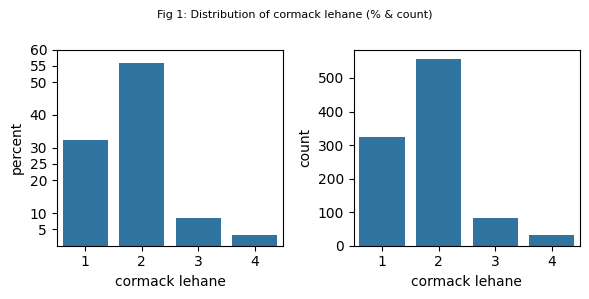

In [34]:
#2.9 Distribution of categories in cormack lahane:
fig, axs = plt.subplots(1,2, figsize=(6, 3))
g=sns.countplot(x='cormack lehane', data=df, stat='percent', ax = axs[0])
_=g.set_yticks([5,10,20,25,30,40,50,55, 60])
_=sns.countplot(x='cormack lehane', data=df, ax = axs[1])
_=plt.suptitle('Fig 1: Distribution of cormack lehane (% & count)', fontsize = 8)
_=plt.tight_layout()
_=plt.show()

###### **Observations-1**:

>56% of our sample has cormack lehane of 2 and 3% of our sample has cormack lehane of 4.

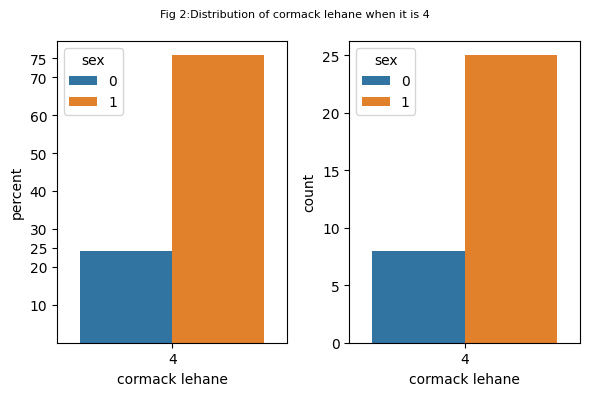

In [35]:
# When cormack lehane of 4
filtered_df = df.loc[df['cormack lehane'] == 4 , : ]
# Most of those who have cormack lehane of 4 are men
fig, axs = plt.subplots(1,2, figsize=(6, 4))
g=sns.countplot(x='cormack lehane', data=filtered_df, stat='percent', hue = 'sex', ax = axs[0])
_=g.set_yticks([10,20,25,30,40,50,60,70,75])
_=sns.countplot(x='cormack lehane', data=filtered_df, hue = 'sex', ax = axs[1])
_=plt.suptitle('Fig 2:Distribution of cormack lehane when it is 4', fontsize = 8)
_=plt.tight_layout()
_=plt.show()

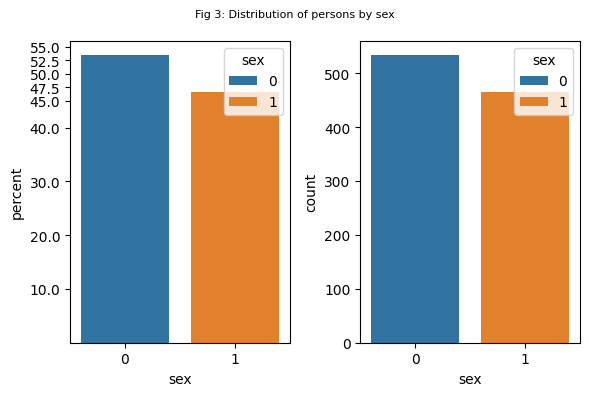

In [36]:
# And here is overall %sex distribution
# Relatively we have less males and more females
fig, axs = plt.subplots(1,2, figsize=(6, 4))
g=sns.countplot(x='sex', data=df, stat='percent', hue = 'sex', ax = axs[0])
_=g.set_yticks([10,20,30,40,45,47.5,50,52.5,55])
_=sns.countplot(x='sex', data=df, hue = 'sex', ax = axs[1])
_=plt.suptitle('Fig 3: Distribution of persons by sex', fontsize = 8)
_=plt.tight_layout()
_=plt.show()

###### **Observations-2**

>Overall in our sample there are more males than females. Most of those who have cormack lehane of 4 are men.

### Distribution of individual categorical features

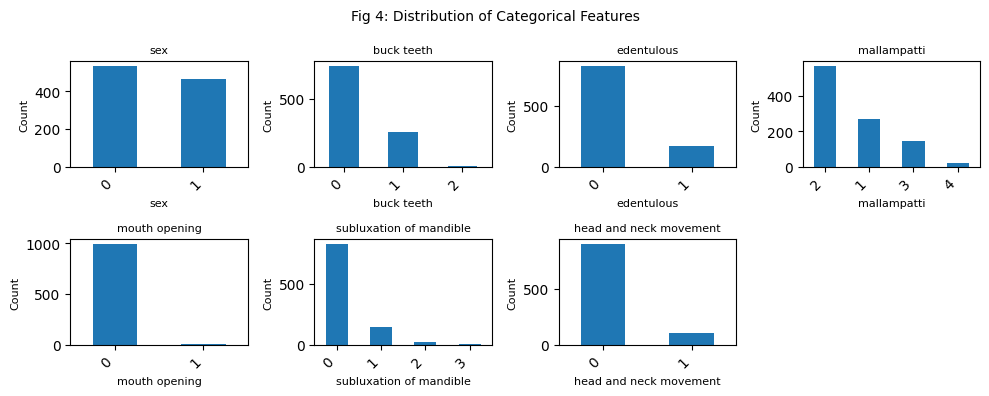

In [37]:
# Distribution of categorical features:
fig, axes = plt.subplots(2, 4, figsize=(10, 4))
_=fig.suptitle('Fig 4: Distribution of Categorical Features', fontsize=10)

for i, col in enumerate(cat_features):
    ax = axes[i // 4, i % 4]
    _=df[col].value_counts().plot(kind='bar', ax=ax)
    _=ax.set_title(col, fontsize=8)
    _=ax.set_xlabel(col, fontsize=8)
    _=ax.set_ylabel('Count', fontsize=8)
    _=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    if i == 6:
       _=plt.axis('off')

_=plt.tight_layout()
_=plt.show()

###### **Observations-3**

>`sex` has almost balanced distribution with females being higher in numbers. For `buck teeth`, level 2 is very rare. For `mouth opening` level 1 is rare, so also level 3 for `subluxation of mandible`.

### Distribution of numeric features
With gender, cormack lehane and sex

#### With gender

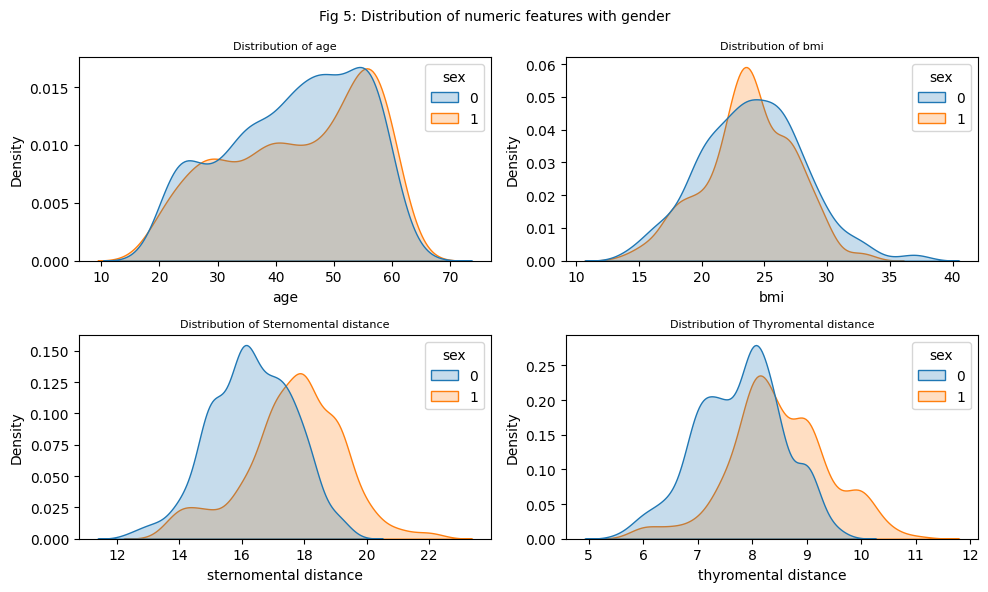

In [38]:
fig, axs = plt.subplots(2,2, figsize=(10, 6))
_=plt.suptitle('Fig 5: Distribution of numeric features with gender', fontsize=10)
_=sns.kdeplot(data = df, x = "age", hue ='sex', ax =axs[0,0], fill=True)
_=axs[0,0].set_title("Distribution of age", fontsize = 8)
_=sns.kdeplot(data = df, x ="bmi" , hue = 'sex', ax =axs[0,1], fill = True)
_=axs[0,1].set_title("Distribution of bmi", fontsize = 8)
_=sns.kdeplot(data = df, x = "sternomental distance", hue ='sex', ax =axs[1,0], fill=True)
_=axs[1,0].set_title("Distribution of Sternomental distance", fontsize = 8)
_=sns.kdeplot(data = df, x = "thyromental distance" , hue = 'sex', ax =axs[1,1], fill = True)
_=axs[1,1].set_title("Distribution of Thyromental distance", fontsize = 8)
_=plt.tight_layout()
_=plt.show()


#### With cormack lehane of 4

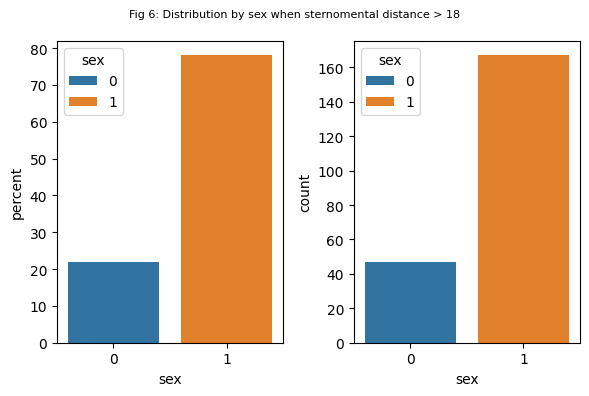

In [39]:
# When sternomental distance > 18
filtered_df = df.loc[df['sternomental distance'] >18 , : ]
# Most of those who have sternomental distance > 18 are men
fig, axs = plt.subplots(1,2, figsize=(6, 4))
_=sns.countplot(x='sex', data=filtered_df, stat='percent', hue = 'sex', ax = axs[0])
_=sns.countplot(x='sex', data=filtered_df, hue = 'sex', ax = axs[1])
_=plt.suptitle('Fig 6: Distribution by sex when sternomental distance > 18', fontsize = 8)
_=plt.tight_layout()
_=plt.show()

#### With cormack lehane and sex

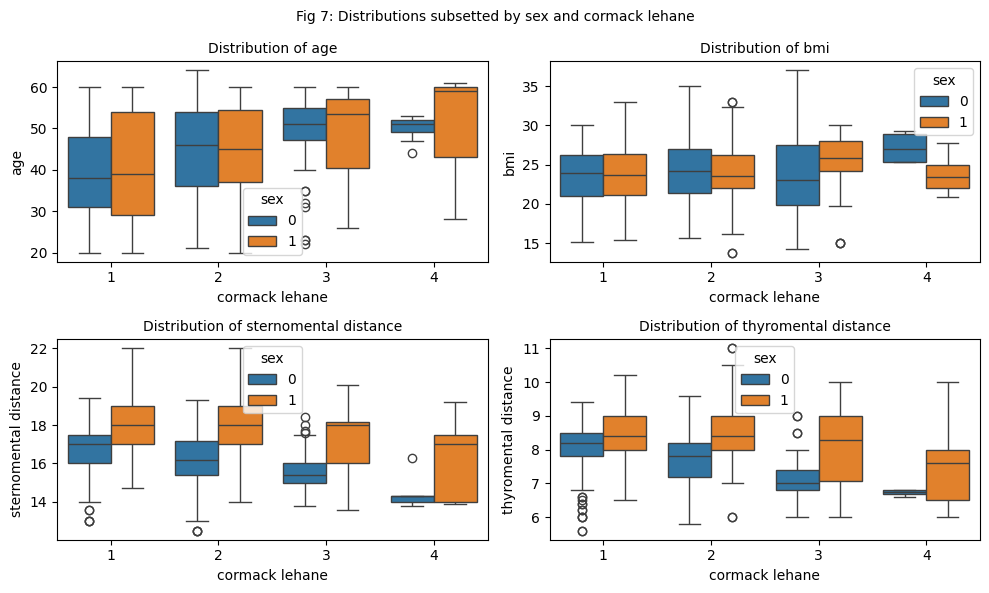

In [41]:
fig, axs = plt.subplots(2,2, figsize=(10, 6))
_=fig.suptitle('Fig 7: Distributions subsetted by sex and cormack lehane', fontsize=10)
fx=sns.boxplot(data=df, x="cormack lehane", y="age", hue="sex", ax=axs[0,0])
_=fx.set_title("Distribution of age" , fontsize=10)
fx=sns.boxplot(data=df, x="cormack lehane", y="bmi", hue="sex", ax=axs[0,1])
_=fx.set_title("Distribution of bmi", fontsize=10)
fx=sns.boxplot(data=df, x="cormack lehane", y="sternomental distance", hue="sex", ax=axs[1,0])
_=fx.set_title("Distribution of sternomental distance", fontsize=10)
fx=sns.boxplot(data=df, x="cormack lehane", y="thyromental distance", hue="sex", ax=axs[1,1])
fx=fx.set_title("Distribution of thyromental distance", fontsize=10)
_=plt.tight_layout()
_=plt.show()

###### **Observations-4**

>1. Age wise and bmi wise distribution among females and males is almost the same. For bmi, we have a flatter density curve for females around the mean as compared to males.   

>2. However, distribution of both `Sternomental distances` and of `Thyromental distances` slide towards right for males--In the case of `Sternomental distances` means for male and female are clearly distinguishable. This behaviour can be seen on prononced basis in the box plots above. Also see bar plots below.     

>3. `Cormack lehane` of 4 occurs mostly in males rather than in females

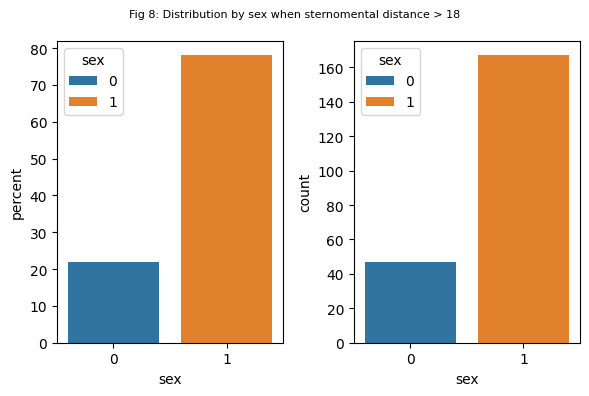

In [42]:
# When sternomental distance > 18
filtered_df = df.loc[df['sternomental distance'] >18 , : ]
# Most of those who have sternomental distance > 18 are men
fig, axs = plt.subplots(1,2, figsize=(6, 4))
_=sns.countplot(x='sex', data=filtered_df, stat='percent', hue = 'sex', ax = axs[0])
_=sns.countplot(x='sex', data=filtered_df, hue = 'sex', ax = axs[1])
_=plt.suptitle('Fig 8: Distribution by sex when sternomental distance > 18', fontsize = 8)
_=plt.tight_layout()
_=plt.show()

### Categorical feature relationships
See these links:  [one](https://stats.stackexchange.com/questions/266001/how-to-determine-significant-associations-in-a-mosaic-plot)  and [two](https://stats.stackexchange.com/a/147864) and [three](https://www.datacamp.com/tutorial/contingency-tables-r)

We look at relationships of categorical features with the target (`cormack lehane`) as also within categocrial features themselves.

#### Mosaic plots and Pearson Residuals
See this good [reference](https://www.datavis.ca/papers/drew/) and this [book](http://euclid.psych.yorku.ca/www/psy6136/ClassOnly/VCDR/book2.pdf) (pages 164..)

**What are mosaic plots?**

>A mosaic plot is a visual representation of the association between two or more categorical variables. It's a rectangular area subdivided into smaller rectangular tiles, with the size of each tile proportional to the observed frequency (or count) of a cell in the contingency table. The mosaic display (Friendly, 1992, 1994b, 1997, Hartigan and Kleiner, 1981, 1984) is like a
grouped barchart, where the heights (or widths) of the bars show the relative frequencies of one variable, and widths (heights) of the sections in each bar show the conditional frequencies of the second variable, given the first. This gives an area-proportional visualization of the frequencies.

>The plot uses color or shading to highlight deviations from expected frequencies, helping to reveal patterns and relationships in the data.  

>Mosaic plot can aometimes be also thought as percent stacked bar plot--a graphical visualization of data from two or more qualitative variables.      

>The default color scheme uses red for negative residuals and blue for positive residuals, with darker shades indicating higher absolute residual values.

>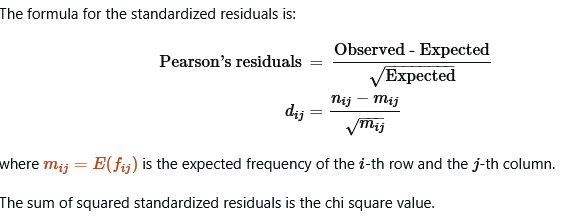

##### mallampatti vs cormack lehane

Contigency table
           cormack_lehane
mallampatti   1   2   3   4
          1 156  98  15   0
          2 154 367  35  12
          3   7  92  27  17
          4   7   0   7   4


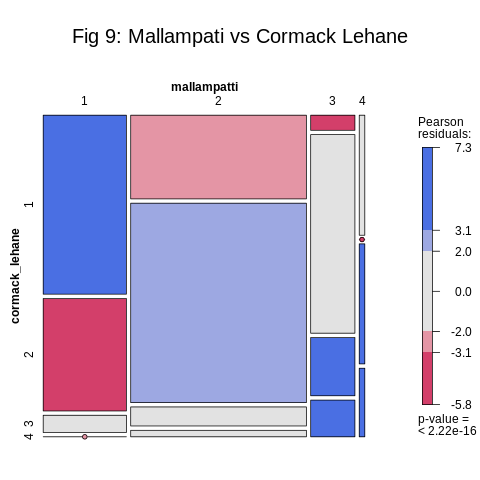

In [43]:
%%R

# Mosaic plot of mallampatti vs cormack lehane
art <- xtabs(~mallampatti + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 9: Mallampati vs Cormack Lehane"
       )

Contigency table
           cormack_lehane
mallampatti   1   2   3   4
          1 156  98  15   0
          2 154 367  35  12
          3   7  92  27  17


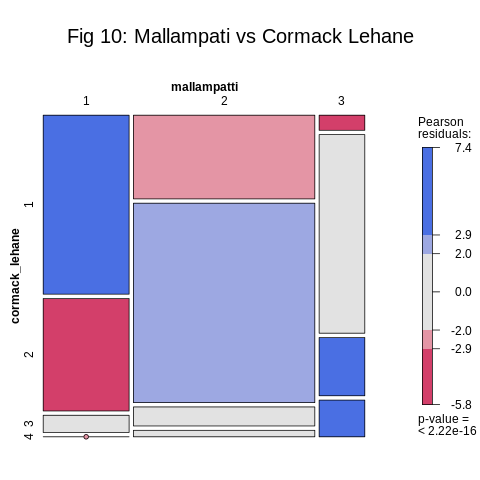

In [44]:
%%R


# Mosaic plot of mallampatti vs cormacl lehane
# Even when I filter out mallampatti of 4
temp<-df_r %>% filter(mallampatti != 4)
temp$mallampatti <- temp$mallampatti[ , drop=TRUE]

art <- xtabs(~mallampatti + cormack_lehane, data = temp)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 10: Mallampati vs Cormack Lehane"
       )

###### **Observations-5**

>`mallampatti` and `cormack lehane` are not independent. Null hypothesis of independence is rejected.

>1. People with mallampatti score of 1 tend to have cormack lehane of 1     
>2. People with mallampatti score of 2 tend to have cormack lehane of 2   
>3. Among those who have cormack_lehane of 4, most have mallamapatti of 3  
         

In [51]:
%%R

temp<-df_r %>% filter(cormack_lehane == 1)
temp$cormack_lahane <- temp$cormack_lehane[ , drop=TRUE]

sapply(temp,table)

$age

20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 
 8  7 10  6  8  5  6 10 13  8  4  8  7  8  8 11 11 16  8  4  6  8  7  5  9  4 
46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 
 7  5 10  5  5  6  7  3 10 16 12 12  9  8  4 

$sex

female   male 
   153    171 

$height

140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 
  3   1   2   5   6  10   4   2   3   2   7   2   6   3   3   9   4   3   8   8 
160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 
 16  13  13  13  14  10  15   1  10   5  15   7  16   3  13  13  10   7   5   1 
180 182 183 184 185 186 188 190 
  9   3   1   4   7   3   5   1 

$subluxation_of_mandible

  0   1   2   3 
279  38   7   0 

$head_and_neck_movement

  0   1 
318   6 

$buck_teeth

  0   1   2 
240  84   0 

$edentulous

  0   1 
284  40 

$bmi

 15.1  15.4  15.6  16.5  16.6  16.8  16.9    17  17.3  17.4  17.6  17.8    18 
    2     1     3     3     1     1     3   

In [31]:
%%R



$age

28 29 30 41 42 43 44 47 50 51 52 53 55 58 59 60 61 
 1  1  1  1  1  2  1  2  1  2  2  1  1  3  5  6  2 

$sex

female   male 
     8     25 

$height

150 152 154 155 156 157 160 163 165 166 167 170 172 174 175 
  1   2   2   2   3   1   3   1   1   1   2   2   6   3   3 

$subluxation_of_mandible

 0  1  2  3 
17 10  3  3 

$head_and_neck_movement

 0  1 
24  9 

$buck_teeth

 0  1  2 
24  9  0 

$edentulous

 0  1 
22 11 

$bmi

20.9   21   22 22.5 23.4   24 24.9   25 25.3 27.7 28.8 29.3 
   2    1    4    5    3    2    2    3    4    3    2    2 

$sternomental_distance

13.8 13.9   14 14.2 14.3   15 16.3 16.4   17 17.2 17.3 17.5 17.6 18.2 18.3   19 
   1    5    5    1    4    1    1    1    5    1    1    1    1    1    1    2 
19.2 
   1 

$thyromental_distance

  6 6.5 6.6 6.7 6.8   7 7.3 7.4 7.6 7.8   8   9 9.8  10 
  2   5   3   2   4   1   2   1   2   1   5   2   1   2 

$mallampatti

 1  2  3  4 
 0 12 17  4 

$mouth_opening

 0  1 
29  4 

$cormack_lehane

 1  2  3  

##### sex vs cormack lehane

Contigency table
        cormack_lehane
sex        1   2   3   4
  female 153 326  46   8
  male   171 231  38  25


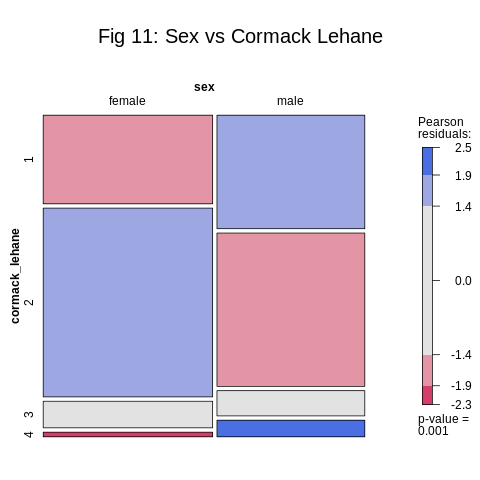

In [45]:
%%R

# Mosaic plot of sex vs cormack lehane
art <- xtabs(~sex + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 11: Sex vs Cormack Lehane"
       )

###### **Observations-6**

>`sex` and `cormack lehane` have dependency
>1. Females tend to have cormack lehane of 2      
>2. Among those who have cormack lehane of 4, more are males and 4.

##### mouth_opening vs cormack lehane

Contigency table
             cormack_lehane
mouth_opening   1   2   3   4
            0 324 551  84  29
            1   0   6   0   4


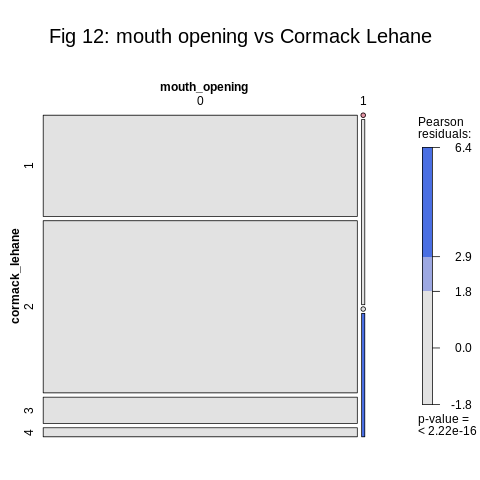

In [46]:
%%R

# Mosaic plot of mouth_opening vs cormack lehane
art <- xtabs(~mouth_opening + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 12: mouth opening vs Cormack Lehane"
       )

###### **Observations-7**

>As per p-value `mouth opening` and `cormack lehane` appear to be dependent. But, as counts for mouth opening 1 are few, this observkation is a suspect.

##### edentulous vs cormack lehane

Contigency table
          cormack_lehane
edentulous   1   2   3   4
         0 284 456  63  22
         1  40 101  21  11


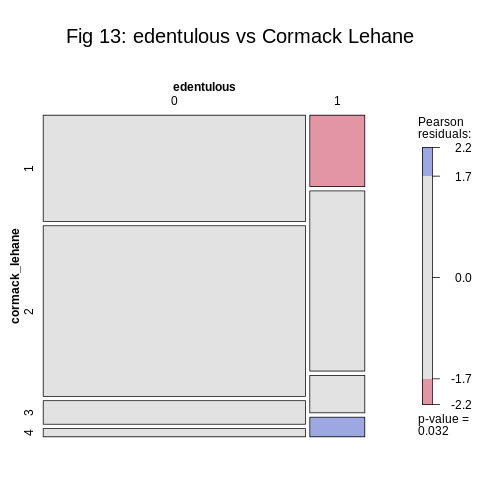

In [47]:
%%R
# Mosaic plot of edentulous vs cormack lehane
art <- xtabs(~edentulous + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 13: edentulous vs Cormack Lehane"
       )

###### **Observations-8**

>`edentulous` and `cormack lehane` do not appear to be strongly related.

##### buck_teeth vs cormack lehane

Contigency table
          cormack_lehane
buck_teeth   1   2   3   4
         0 240 425  51  24
         1  84 131  33   9


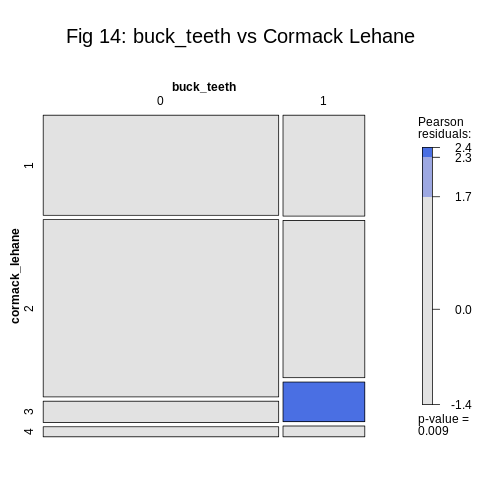

In [48]:
%%R

# Mosaic plot of buck_teeth vs cormack lehane
# Filtering out buck_teeth of 2
temp<-df_r %>% filter(buck_teeth != 2)
temp$buck_teeth <- temp$buck_teeth[ , drop=TRUE]

art <- xtabs(~buck_teeth + cormack_lehane, data = temp)
cat("Contigency table\n")
cat("==============\n")
print(art)



mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 14: buck_teeth vs Cormack Lehane"
       )

###### **Observations-9**

>Both buck_teeth and cormack lehane are not independent

##### subluxation_of_mandible vs cormack lehane

Contigency table
                       cormack_lehane
subluxation_of_mandible   1   2   3   4
                      0 279 471  59  17
                      1  38  81  14  10
                      2   7   5   9   3
                      3   0   0   2   3


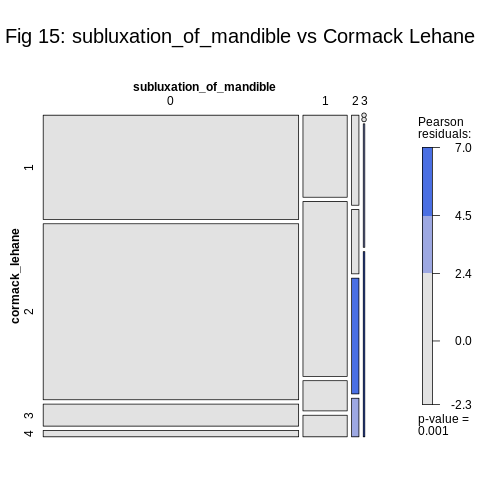

In [53]:
%%R

# Mosaic plot of subluxation_of_mandible vs cormack lehane
art <- xtabs(~subluxation_of_mandible + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)


mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 15: subluxation_of_mandible vs Cormack Lehane")

Contigency table
                       cormack_lehane
subluxation_of_mandible   1   2   3   4
                      0 279 471  59  17
                      1  38  81  14  10
                      2   7   5   9   3


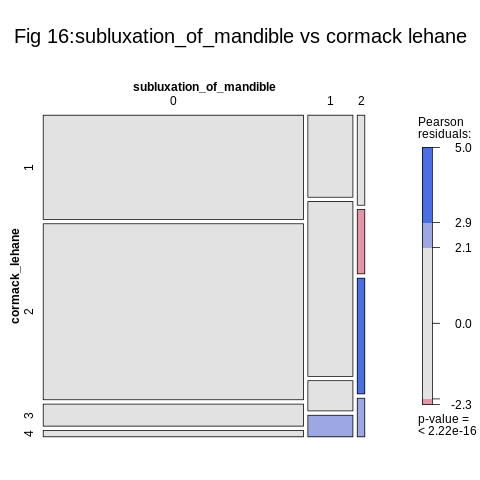

In [54]:
%%R

# Mosaic plot of subluxation_of_mandible vs cormack lehane

# Filtering out subluxation_of_mandible of 3
temp<-df_r %>% filter(subluxation_of_mandible != 3)
temp$subluxation_of_mandible <- temp$subluxation_of_mandible[ , drop=TRUE]


art <- xtabs(~subluxation_of_mandible + cormack_lehane, data = temp)

cat("Contigency table\n")
cat("==============\n")
print(art)


mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 16:subluxation_of_mandible vs cormack lehane")

###### **Observations-10**

>`subluxation_of_mandible` vs `cormack Lehane` are not independent.

##### head_and_neck_movement vs cormack lehane

Contigency table
                      cormack_lehane
head_and_neck_movement   1   2   3   4
                     0 318 492  60  24
                     1   6  65  24   9


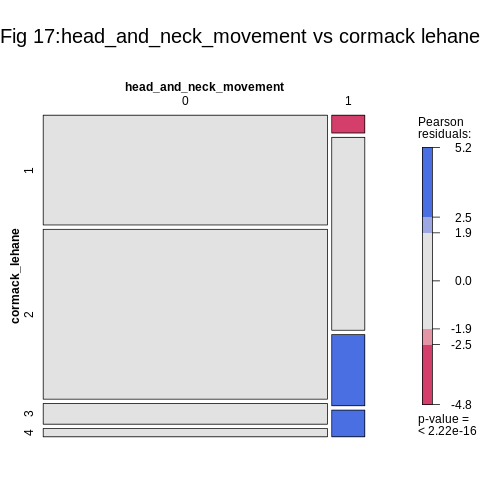

In [56]:
%%R

# Mosaic plot of head_and_neck_movement vs cormack lehane
art <- xtabs(~head_and_neck_movement + cormack_lehane, data = df_r)

cat("Contigency table\n")
cat("==============\n")
print(art)

mosaic(art, gp = shading_max,
       split_vertical = TRUE,
       main="Fig 17:head_and_neck_movement vs cormack lehane")


###### **Observations-11**

>1. cormack lehane` and `head and neck movement` are not independent.       
>2. Those with head_and_neck_movement of 1 tend not to have cormack lehane of 1
>3. Those with head_and_neck_movement of 0 have no preference for any score of cormack lehane.

                      subluxation_of_mandible
head_and_neck_movement   0   1   2
                     0 761 112  18
                     1  65  31   6


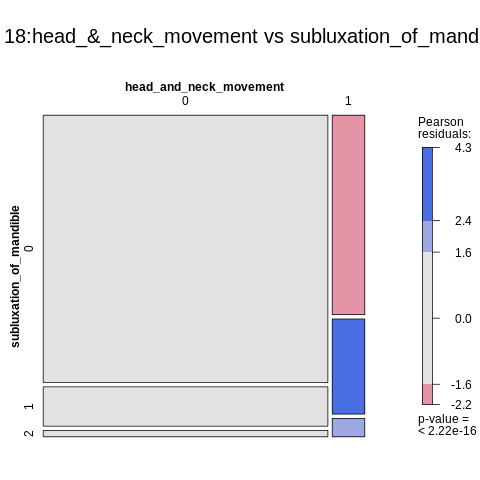

In [58]:
%%R

# Filtering out subluxation_of_mandible of 3
temp<-df_r %>% filter(subluxation_of_mandible != 3)
temp$subluxation_of_mandible <- temp$subluxation_of_mandible[ , drop=TRUE]


#5. head_and_neck_movement vs subluxation_of_mandible
art <- xtabs(~head_and_neck_movement + subluxation_of_mandible, data = temp)

print(art)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 18:head_&_neck_movement vs subluxation_of_mandible"
       )

###### **Observations-12**

>1. `head_and_neck_movement` and `subluxation_of_mandible` are not independent.     

>2. People with `head_and_neck_movement` of 0 have no preference for any level of `subluxation_of_mandible`.  



##### edentulous vs subluxation_of_mandible

          subluxation_of_mandible
edentulous   0   1   2
         0 682 131  10
         1 144  12  14


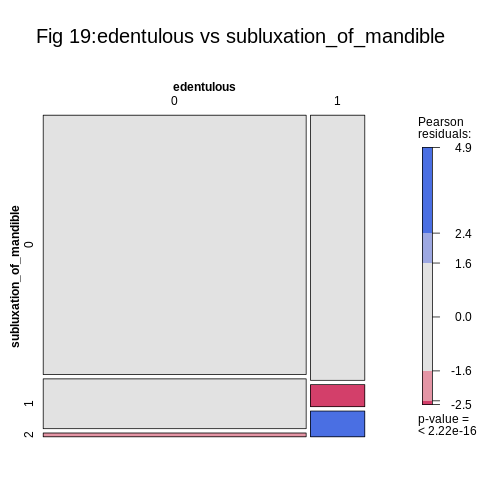

In [59]:
%%R

# edentulous vs subluxation_of_mandible

# Filtering out subluxation_of_mandible of 3
temp<-df_r %>% filter(subluxation_of_mandible != 3)
temp$subluxation_of_mandible <- temp$subluxation_of_mandible[ , drop=TRUE]

art <- xtabs(~edentulous + subluxation_of_mandible  , data = temp)

print(art)
mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 19:edentulous vs subluxation_of_mandible"
       )



###### **Observations-13**

>`edentulous` vs `subluxation_of_mandible` are not independent.

          mallampatti
edentulous   1   2   3   4
         0 228 470 113  14
         1  41  98  30   4


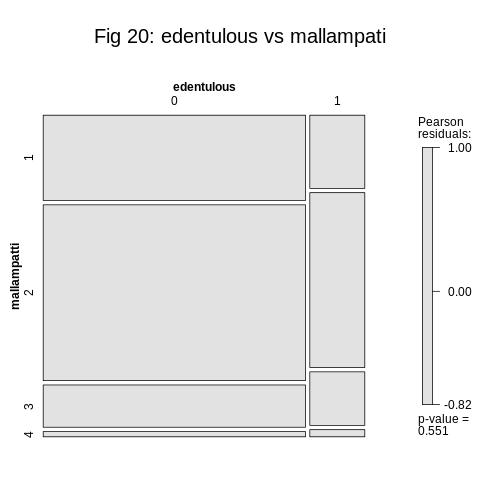

In [60]:
%%R

# 4. Mosaic plot of mallampatti vs edentulous

art <- xtabs(~edentulous + mallampatti, data = df_r)

mosaic(art,
       gp = shading_max,
       split_vertical = TRUE,
       main="Fig 20: edentulous vs mallampati"
       )

print(art)


###### **Observations-14**

>`edentulous` and `mallampatti` are independent

### Relationship between target and numeric features

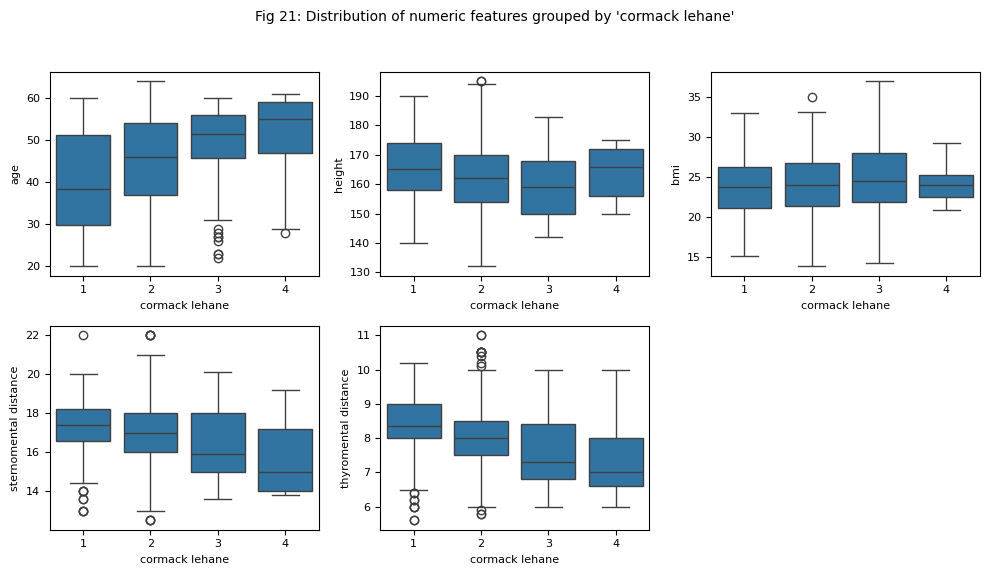

In [61]:

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
_=fig.suptitle("Fig 21: Distribution of numeric features grouped by 'cormack lehane'", fontsize=10)

for i, col in enumerate(num_features):
    ax = axes[i // 3, i % 3]
    _=sns.boxplot(x='cormack lehane', y=col, data=df, ax=ax)
    _=ax.set_xlabel('cormack lehane', fontsize=8)
    _=ax.set_ylabel(col, fontsize=8)
    _=ax.tick_params(axis='x', labelsize=8)
    _=ax.tick_params(axis='y', labelsize=8)


# Delete the last unused axes if necessary (adjust the index based on the number of numeric features)
if len(df[num_features].columns) < 6:
    for i in range(len(df[num_features].columns), 6):
      _=axes.flatten()[i].set_visible(False)


_=plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_=plt.show()


###### **Observations-15**:

>Look at each panel. There is a clear difference in medians of `age`, `height`, `bmi`, `sternomental distance` and `thyromental distance` when subsetted by different levels of cormack lehane. This is a clear indicator that all the numerical features can be good predictors for `cormack lehane`.

### Relationship between thyromental distance and sternomental distance

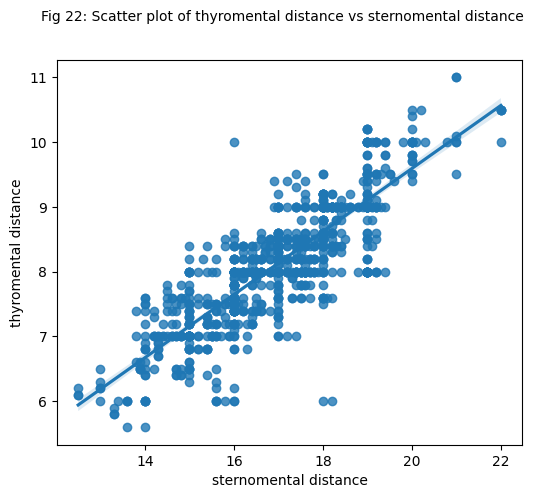

In [72]:
# thyromental distance and sternomental distance do have a linear relationship

fig, axes = plt.subplots(1,1, figsize=(6, 5))
_=sns.regplot(data=df, x="sternomental distance",
              y="thyromental distance")
_=fig.suptitle("Fig 22: Scatter plot of thyromental distance vs sternomental distance", fontsize=10)
_=plt.show()

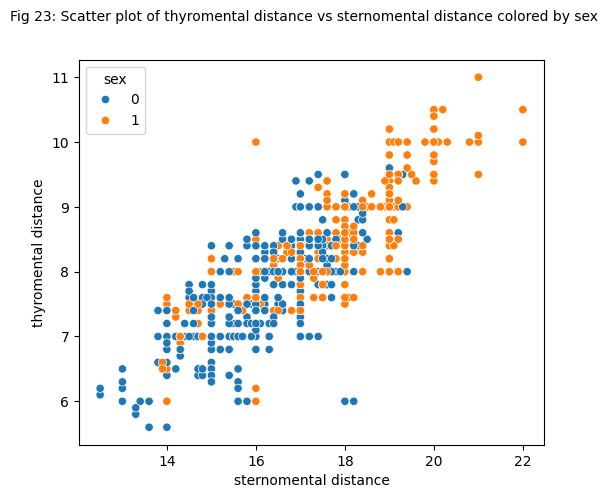

In [73]:
# thyromental distance and sternomental distance subsetted by sex
fig, axes = plt.subplots(1,1, figsize=(6, 5))
_=sns.scatterplot(data=df, x="sternomental distance", hue = 'sex',
              y="thyromental distance")
_=fig.suptitle("Fig 23: Scatter plot of thyromental distance vs sternomental distance colored by sex", fontsize=10)
_=plt.show()

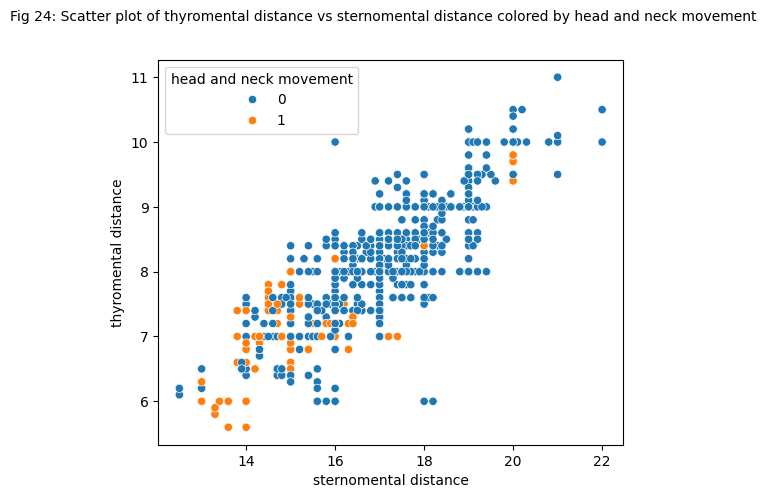

In [75]:
# thyromental distance and sternomental distance subsetted by head and neck movement

fig, axes = plt.subplots(1,1, figsize=(6, 5))
_=sns.scatterplot(data=df, x="sternomental distance", hue = 'head and neck movement',
              y="thyromental distance")

_=fig.suptitle("Fig 24: Scatter plot of thyromental distance vs sternomental distance colored by head and neck movement", fontsize=10)
_=plt.show()

###### **Observations-16**

>1. There is a linear relationship between `thyromental distance` and `sternomental distance`.
>2. There is a clear relationship between `sex` on the one hand and `thyromental distance` and `sternomental distance` on the other hand. Please see Observation-4.
>3. `head and neck movement` on the one hand and the two distances `thyromental distance` and `sternomental distance`are also related.

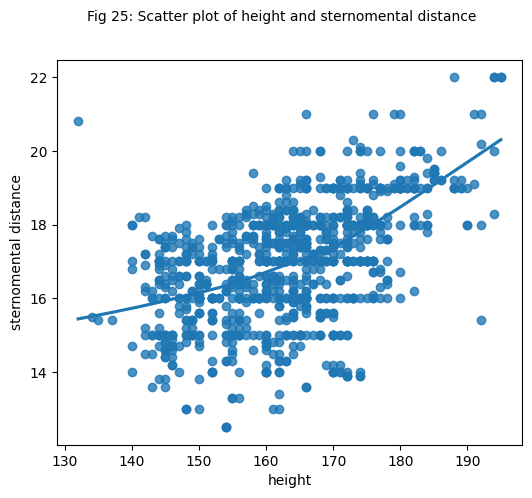

In [76]:
# A weak relationship does exist between height and sternomental distance
fig, axes = plt.subplots(1,1, figsize=(6, 5))
_=sns.regplot(data=df, x="height",
              y="sternomental distance",
              lowess = True)
_=fig.suptitle("Fig 25: Scatter plot of height and sternomental distance", fontsize=10)
_=plt.show()

###### **Observations-17**

>There appears to be a weak relationship or a non-linear relationship between `sternomental distance` and `height`.

### Correlation between numeric features

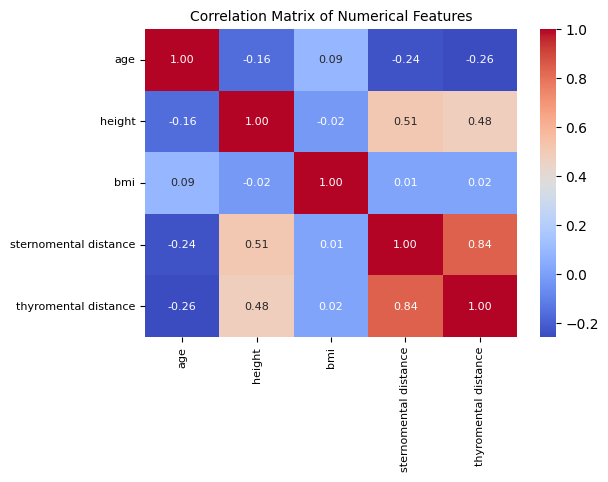

In [ ]:
# Correlation between numeric features

_=plt.figure(figsize=(6, 4))
_=sns.heatmap(df[num_features].corr(),
              annot=True,
              cmap='coolwarm',
              fmt=".2f",
              annot_kws={'size': 8}
              )
_=plt.title('Correlation Matrix of Numerical Features', fontsize=10)
_=plt.xticks(fontsize=8)
_=plt.yticks(fontsize=8)
_=plt.show()


###### **Observations-18**

>We have already discovered the correlated features in our earlier graphs.
>>1. `thyromental distance` and `sternomental distance` have good correlation
>>2. Weak correlation also exists between `height`, on the one hand and `thyromental distance` and `sternomental distance` on theother hand.

## ======== END of Data Visualization ================

In [32]:
%%R

temp<-df_r %>% filter(cormack_lehane == 4)
temp$cormack_lahane <- temp$cormack_lehane[ , drop=TRUE]

sapply(temp,table)

$age

28 29 30 41 42 43 44 47 50 51 52 53 55 58 59 60 61 
 1  1  1  1  1  2  1  2  1  2  2  1  1  3  5  6  2 

$sex

female   male 
     8     25 

$height

150 152 154 155 156 157 160 163 165 166 167 170 172 174 175 
  1   2   2   2   3   1   3   1   1   1   2   2   6   3   3 

$subluxation_of_mandible

 0  1  2  3 
17 10  3  3 

$head_and_neck_movement

 0  1 
24  9 

$buck_teeth

 0  1  2 
24  9  0 

$edentulous

 0  1 
22 11 

$bmi

20.9   21   22 22.5 23.4   24 24.9   25 25.3 27.7 28.8 29.3 
   2    1    4    5    3    2    2    3    4    3    2    2 

$sternomental_distance

13.8 13.9   14 14.2 14.3   15 16.3 16.4   17 17.2 17.3 17.5 17.6 18.2 18.3   19 
   1    5    5    1    4    1    1    1    5    1    1    1    1    1    1    2 
19.2 
   1 

$thyromental_distance

  6 6.5 6.6 6.7 6.8   7 7.3 7.4 7.6 7.8   8   9 9.8  10 
  2   5   3   2   4   1   2   1   2   1   5   2   1   2 

$mallampatti

 1  2  3  4 
 0 12 17  4 

$mouth_opening

 0  1 
29  4 

$cormack_lehane

 1  2  3  